 <a id="1">Introduction</a>  

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there have not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.  



### Loading necessary libraries

In [25]:
import pandas as pd
pd.set_option ( "display.max_rows" , None )
pd.set_option ( "display.max_columns" , None )
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score , confusion_matrix
import warnings
warnings.filterwarnings ( "ignore" )

### Loading the Data

In [26]:
data = pd.read_csv ( "creditcard.csv" )
data.head ( )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
# Number of Records and Features
print ( "Rows:" , data.shape [ 0 ] )
print ( "Columns:" , data.shape [ 1 ] )

Rows: 284807
Columns: 31


In [28]:
# Feature names with their data types and null values (if any)
pd.DataFrame ( { "Feature" : data.columns , "Data Type" : list ( data.dtypes ) , \
     "Null Values" : list ( data.isnull ( ).sum ( ) ) } )

,Feature,Data Type,Null Values
0,Time,float64,0
1,V1,float64,0
2,V2,float64,0
3,V3,float64,0
4,V4,float64,0
5,V5,float64,0
6,V6,float64,0
7,V7,float64,0
8,V8,float64,0
9,V9,float64,0


In [29]:
# Descriptive statistics
data.describe ( )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


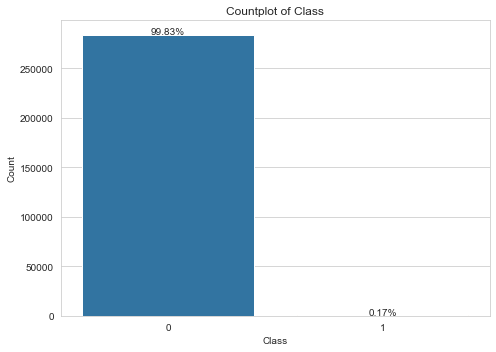

In [30]:
plt.rcParams [ "figure.figsize" ] = [ 7 , 5 ]
plt.rcParams [ "figure.autolayout" ] = True

counts = data [ "Class" ].value_counts ( )
ax = sns.barplot ( x = counts.index  , y = list ( counts ) )
percentage = list ( np.array ( list ( counts ) ) / data.shape [ 0 ] * 100 )
patches = ax.patches
for i in range ( len ( patches ) ):
    x = patches [ i ].get_x ( ) + patches [ i ].get_width ( ) / 2
    y = patches [ i ].get_height ( ) + 0.05
    ax.annotate ( '{:.2f}%' .format ( percentage [ i ] ) 
                    , ( x , y ) , ha = 'center' )
                    
plt.title ( "Countplot of Class" )
plt.xlabel ( "Class" )
plt.ylabel ( "Count" )
plt.xticks ( rotation = 0 )
plt.show ( )

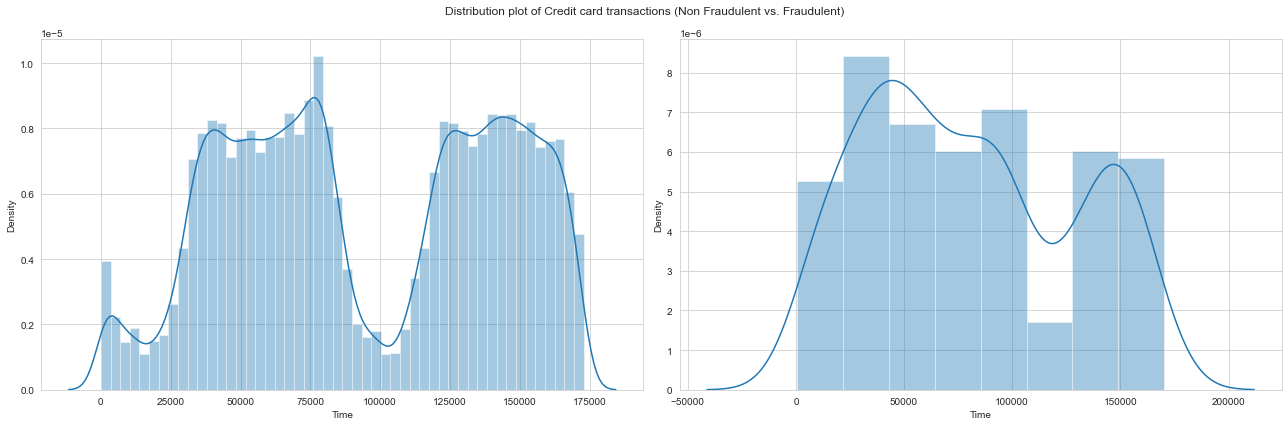

In [31]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.distplot ( data [ data [ "Class" ] == 0 ] [ "Time" ] , ax = ax1 )
s = sns.distplot ( data [ data [ "Class" ] == 1 ] [ "Time" ] , ax = ax2 )

plt.suptitle ( "Distribution plot of Credit card transactions (Non Fraudulent vs. Fraudulent)" )

plt.show ( )

Fraudulent transactions have a distribution which is more even than the valid transactions.

Let's look into more details of the time distribution for both the classes as well as aggregated values of transaction count and amount per hour. We know (based on observation of the time distribution of transactions) that the time unit is in seconds.

In [32]:
data [ "Hour" ] = data [ "Time" ].apply ( lambda x : np.floor ( x  / 3600 ) )

df = data.groupby ( [ "Hour" , "Class" ] ) [ "Amount" ].agg ( [ "min" , "max" , "count" , "sum" , "mean" , "median" , "var" ] ).reset_index ( )
df.head ( )

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


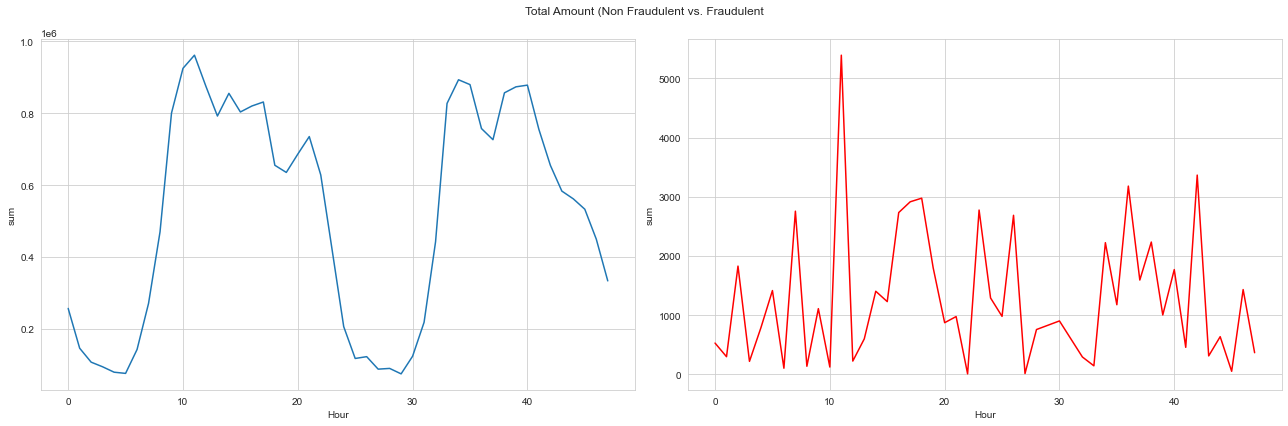

In [33]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "sum" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "sum" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Total Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

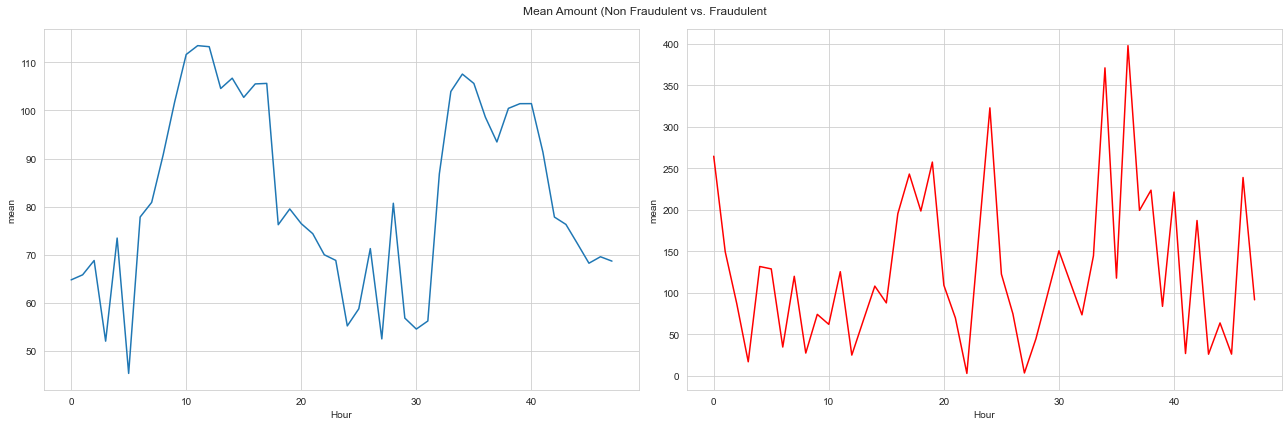

In [34]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "mean" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "mean" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Mean Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

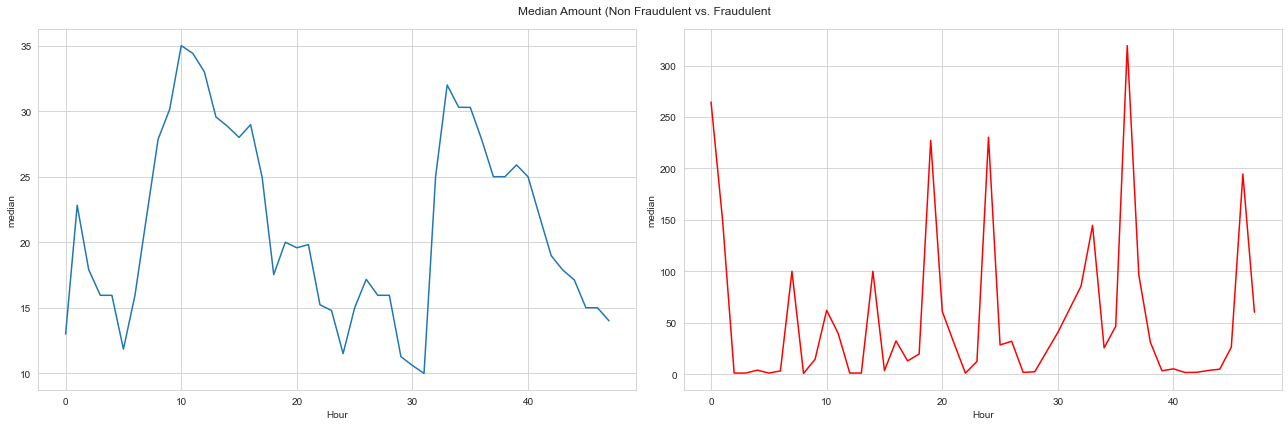

In [35]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "median" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "median" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Median Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

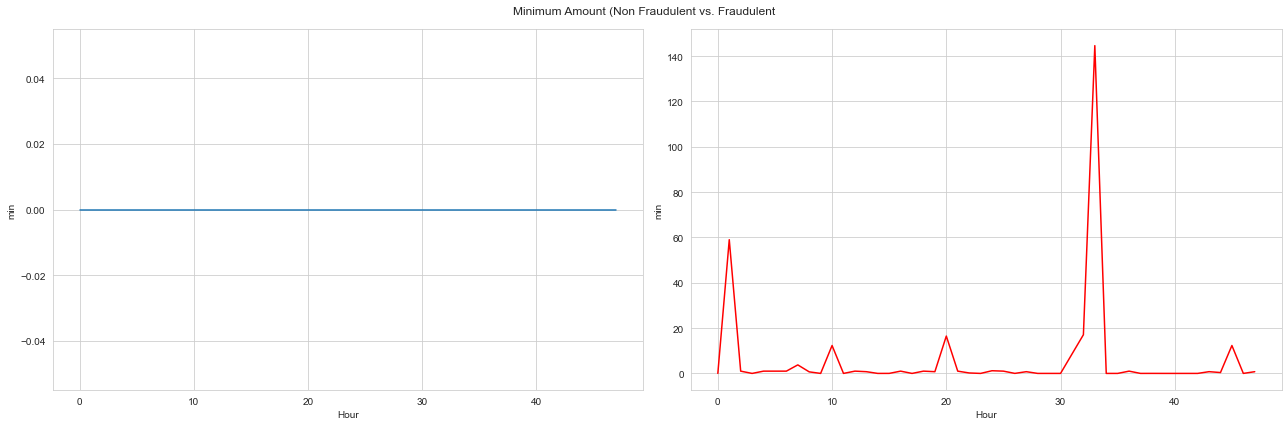

In [36]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "min" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "min" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Minimum Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

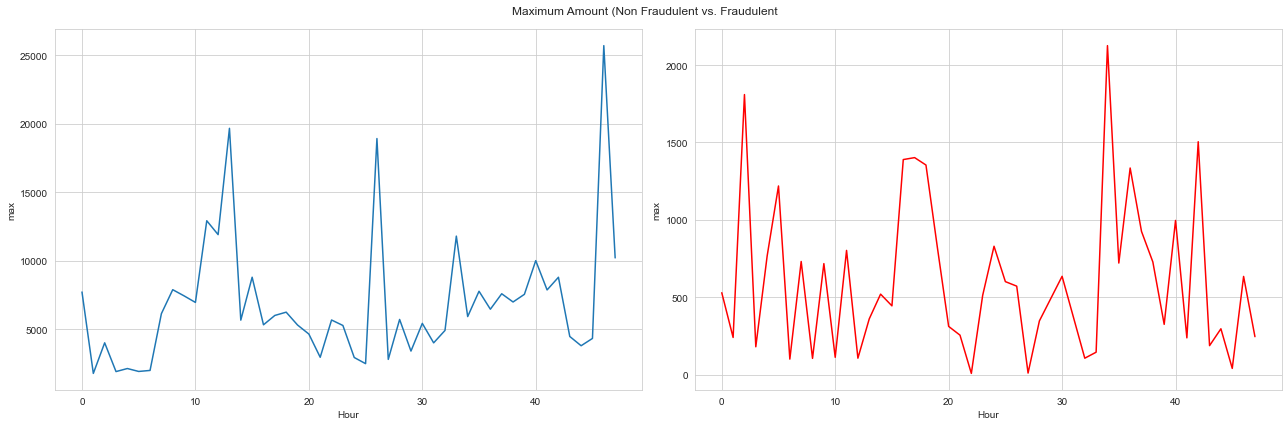

In [37]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "max" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "max" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Maximum Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

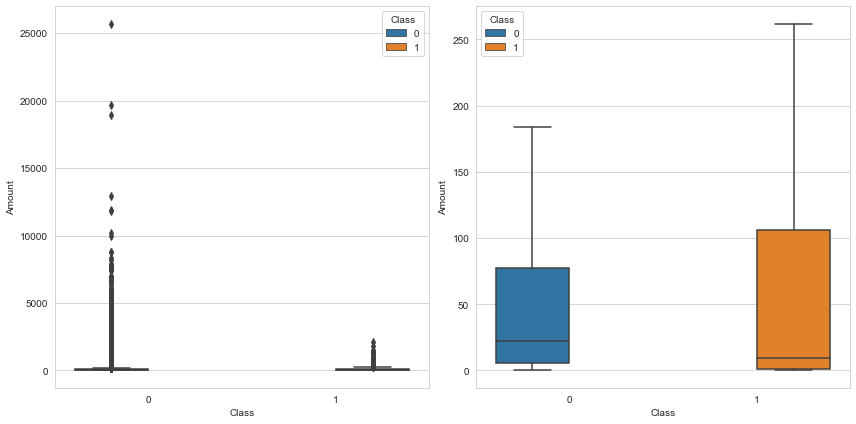

In [38]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 12 , 6 ) )
s = sns.boxplot ( ax = ax1 , y = data [ "Amount" ] , x = data [ "Class" ] , hue = data [ "Class" ] , showfliers = True )
s = sns.boxplot ( ax = ax2 , y = data [ "Amount" ] , x = data [ "Class" ] , hue = data [ "Class" ] , showfliers = False )
plt.show ( )

In [39]:
pd.DataFrame ( { "Metrics" : data [ data [ "Class" ] == 0 ] [ "Amount" ].describe ( ).index , \
    "Class_0" : list ( data [ data [ "Class" ] == 0 ] [ "Amount" ].describe ( ) ) , \
        "Class_1" : list ( data [ data [ "Class" ] == 1 ] [ "Amount" ].describe ( ) ) } )

,Metrics,Class_0,Class_1
0,count,284315.000000,492.000000
1,mean,88.291022,122.211321
2,std,250.105092,256.683288
3,min,0.000000,0.000000
4,25%,5.650000,1.000000
5,50%,22.000000,9.250000
6,75%,77.050000,105.890000
7,max,25691.160000,2125.870000


- The mean of fraudulent transactions looks skewed as Q3 or the 75th percentile is higher than non-fraudulent transactions.

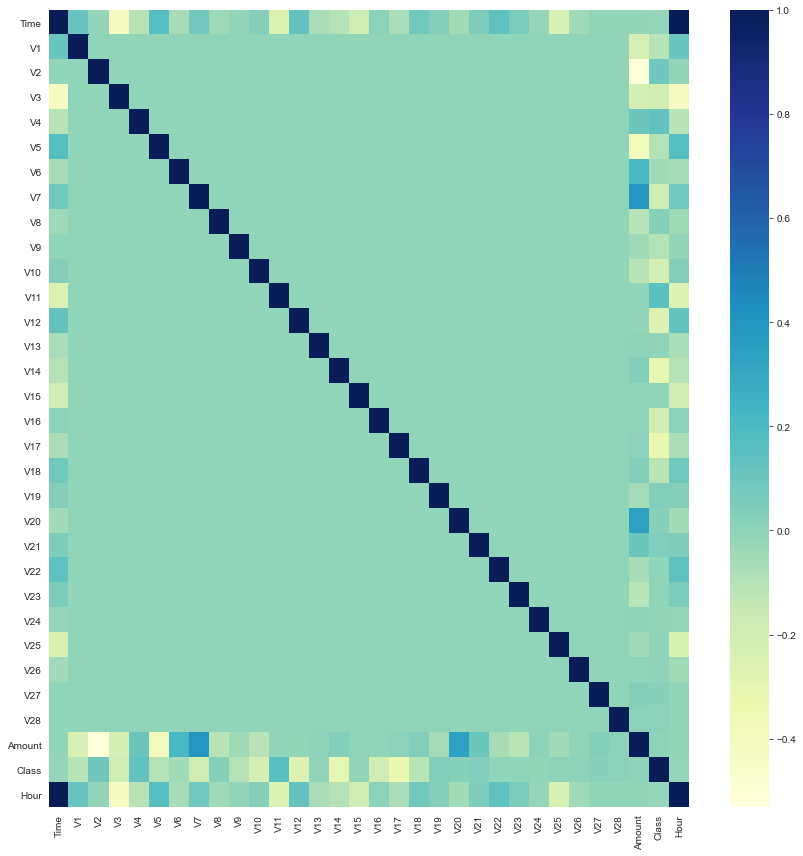

In [40]:
f , ax = plt.subplots ( figsize = ( 12 , 12 ) )
sns.heatmap ( data.corr ( ) , annot = False , cmap = "YlGnBu" )
plt.show ( )

Let's plot the correlated and inverse correlated values on the same graph.
We can observe that there exists a negative correlation between Time and V3, a positive correlation between Amount and V7 & V20 and negative correlation with V2 and V5.

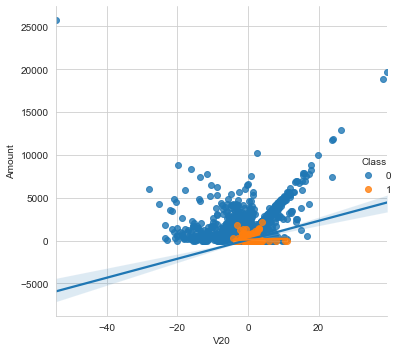

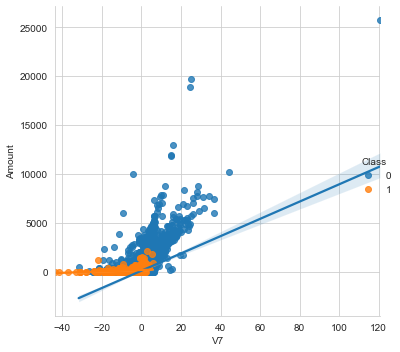

In [41]:
s = sns.lmplot ( data = data , x = "V20" , y = "Amount" , hue = "Class" )
s = sns.lmplot ( data = data , x = "V7" , y = "Amount" , hue = "Class" )
plt.show ( )

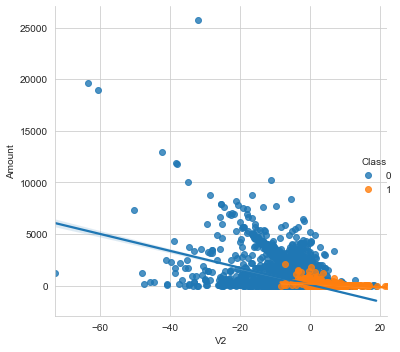

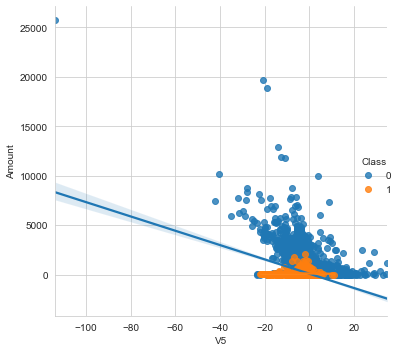

In [42]:
s = sns.lmplot ( data = data , x = "V2" , y = "Amount" , hue = "Class" )
s = sns.lmplot ( data = data , x = "V5" , y = "Amount" , hue = "Class" )
plt.show ( )

##### Building Kernel Density Estimation plots

<Figure size 504x360 with 0 Axes>

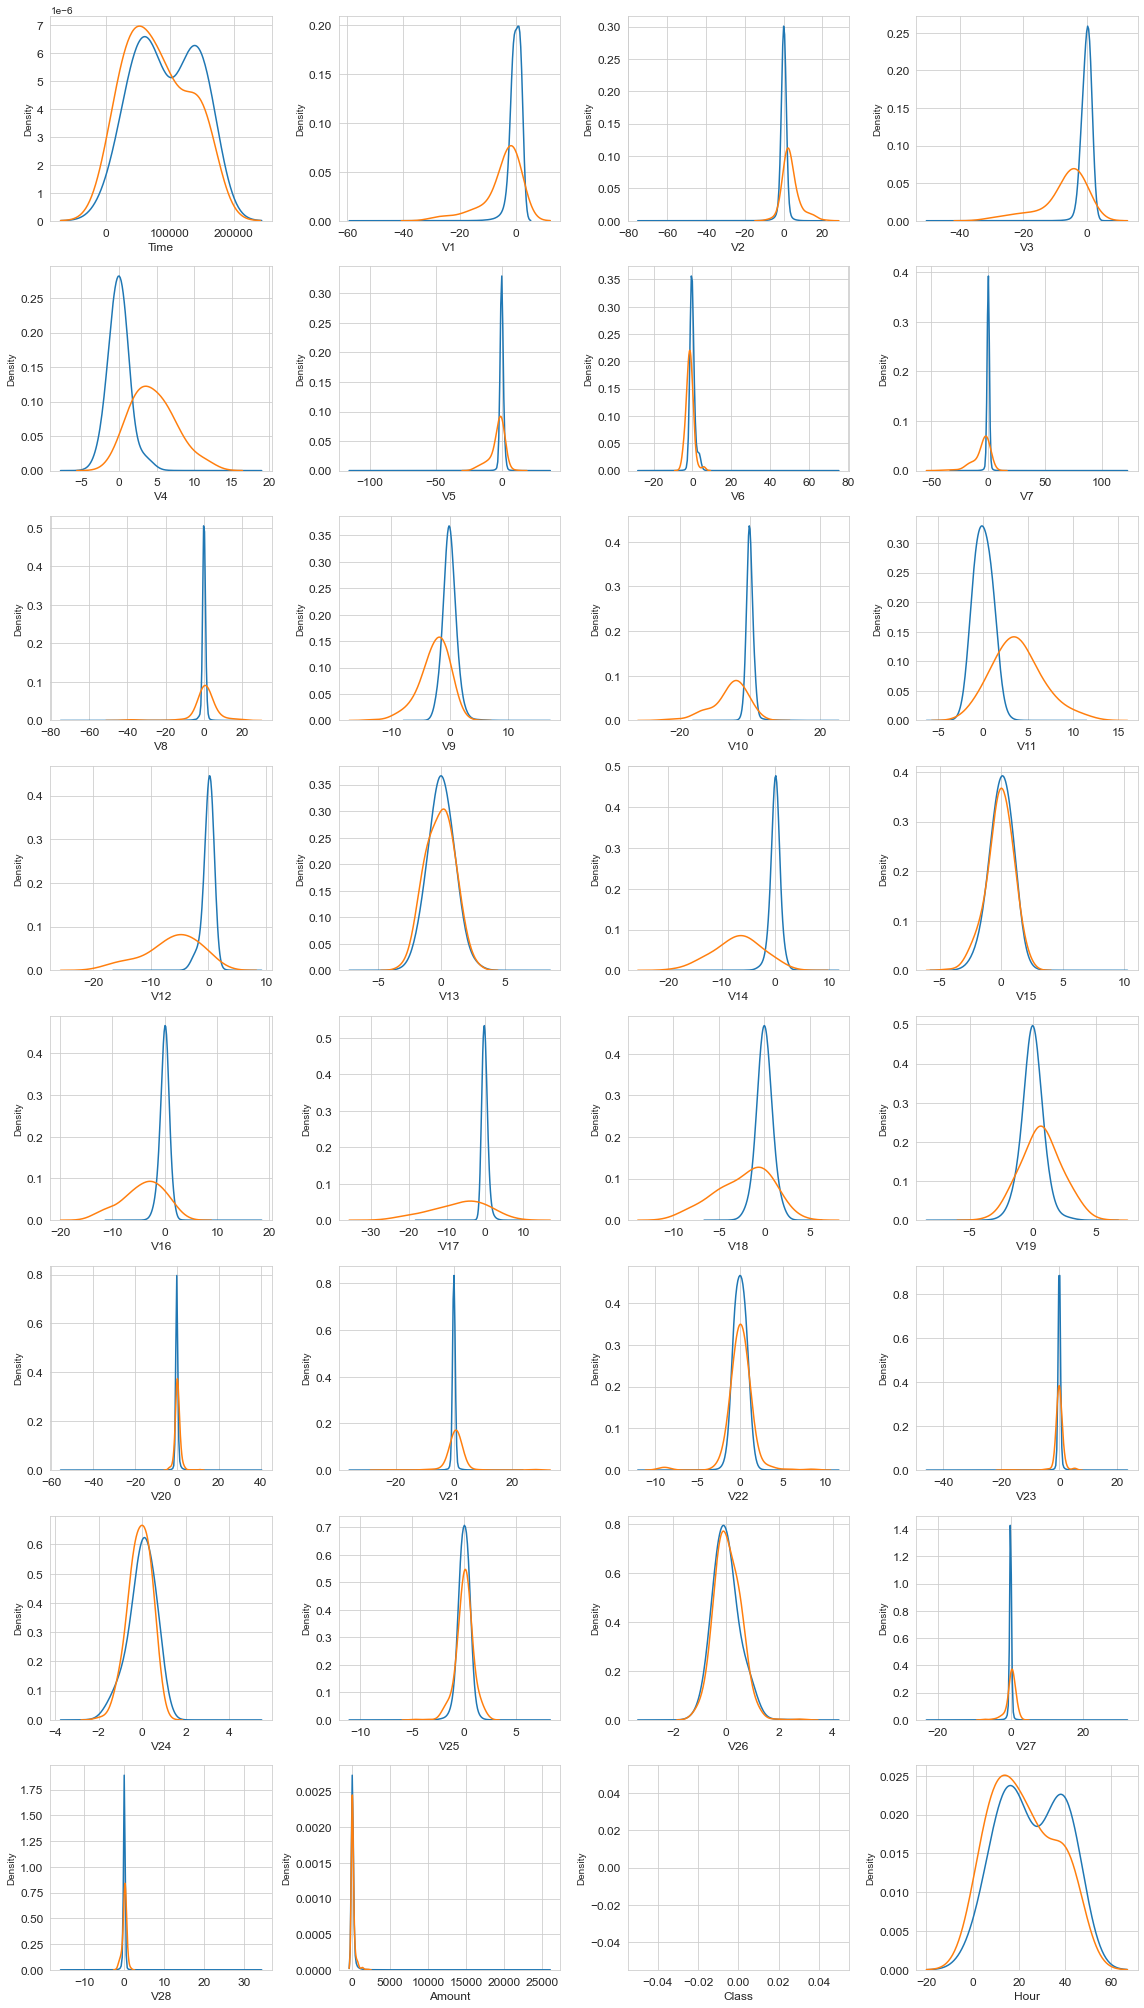

In [43]:
var = data.columns.values
i = 0
t0 = data [ data [ 'Class'] == 0 ]
t1 = data [ data [ 'Class'] == 1 ]

sns.set_style ( 'whitegrid' )
plt.figure ( )
fig , ax = plt.subplots ( 8 , 4 , figsize = ( 16 , 28 ) )

for feature in var:
    i += 1
    plt.subplot ( 8 , 4 , i )
    sns.kdeplot ( t0 [ feature ] , bw = 0.5 , label = "Class_0" )
    sns.kdeplot ( t1 [ feature]  , bw = 0.5 , label = "Class_1" )
    plt.xlabel ( feature , fontsize = 12 )
    locs , labels = plt.xticks ( )
    plt.tick_params ( axis = 'both' , which = 'major' , labelsize = 12 )
plt.show ( )

For some of the features we can observe a good selectivity in terms of distribution for the two values of **Class**: **V4**, **V11** have clearly separated distributions for **Class** values 0 and 1, **V12**, **V14**, **V18** are partially separated, **V1**, **V2**, **V3**, **V10** have a quite distinct profile, whilst **V25**, **V26**, **V28** have similar profiles for the two values of **Class**.  

In general, with just few exceptions (**Time** and **Amount**), the features distribution for legitimate transactions (values of **Class = 0**)  is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of **Class = 1**) have a skewed (asymmetric) distribution.

### Multicolinearity

In [44]:
columns = list ( data.columns )
columns.remove ( "Class" )

vif_data = pd.DataFrame ( )
vif_data [ "Features" ] = columns
  
vif_data [ "VIF" ] = [ variance_inflation_factor ( data [ columns ].values, i ) for i in range ( len ( data [ columns ].columns ) ) ]
vif_data

,Features,VIF
0,Time,7925.875472
1,V1,1.626122
2,V2,3.984493
3,V3,1.387219
4,V4,1.137964
5,V5,2.772721
6,V6,1.532447
7,V7,2.598081
8,V8,1.105058
9,V9,1.018886


- Since Hour is a derived variable and Time holds more information compared to it, we end up dropping Hour. The VIF for all the other continuous variables looks decent.

In [45]:
data.drop ( "Hour" , axis = 1 , inplace = True )

### Train-Test Split

In [46]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [47]:
X , y  = data.drop ( "Class" , axis = 1 ) , data [ "Class" ]
print ( "Dimensions of X:" , X.shape )
print ( "Dimensions of y:" , y.shape )

X_train_valid , X_test , y_train_valid , y_test = train_test_split ( X , y ,  test_size = 0.2 , random_state = 37 )
X_train , X_valid , y_train , y_valid = train_test_split ( X_train_valid , y_train_valid ,  test_size = 0.2 , random_state = 37 )

print ( "X_train:" , X_train.shape )
print ( "y_train:" , y_train.shape )
print ( "X_test:" , X_test.shape )
print ( "y_test" , y_test.shape )
print ( "X_valid:" , X_valid.shape )
print ( "y_valid:" , y_valid.shape )

Dimensions of X: (284807, 30)
Dimensions of y: (284807,)
X_train: (182276, 30)
y_train: (182276,)
X_test: (56962, 30)
y_test (56962,)
X_valid: (45569, 30)
y_valid: (45569,)


### Predictive Modelling

In [49]:
model = RandomForestClassifier ( n_estimators = 100 , n_jobs = -1 , 
                                random_state = 37 , verbose = False )
model.fit ( X_train , y_train )
preds = model.predict ( X_test )

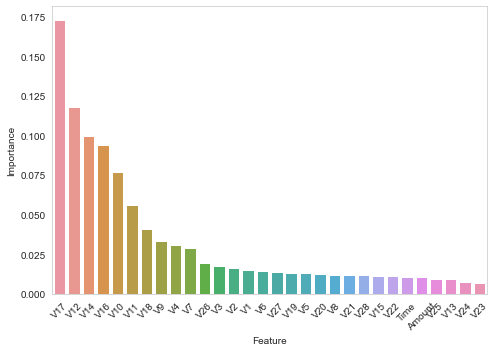

,Feature,Importance
17,V17,0.172886
12,V12,0.117871
14,V14,0.099915
16,V16,0.093835
10,V10,0.076894
11,V11,0.056356
18,V18,0.041023
9,V9,0.033193
4,V4,0.030950
7,V7,0.028757


In [60]:
df = pd.DataFrame ( { "Feature" : X.columns , "Importance" : model.feature_importances_ } ).sort_values ( by = "Importance" , ascending = False )
sns.barplot ( df [ "Feature" ] , df [ "Importance" ] )
plt.xticks ( rotation = 45 )
plt.grid ( False )
plt.show ( )
df